# 1.0 Procesamiento de Texto

Por Daniela Opitz (dopitz@udd.cl). Actualizado el día 18 de marzo del 2024.

In [1]:
import pandas as pd
import numpy as np

In [2]:
names = pd.Series(['Francisca', 'Diego', 'LEo', 'eDU', 'Dani'])
names

0    Francisca
1        Diego
2          LEo
3          eDU
4         Dani
dtype: object

In [3]:
names.str.contains('o')

0    False
1     True
2     True
3    False
4    False
dtype: bool

In [4]:
names[names.str.contains('o')]

1    Diego
2      LEo
dtype: object

In [5]:
names[names.str.startswith('D')]

1    Diego
4     Dani
dtype: object

## Cambiar la capitalizacion

In [6]:
names.str.lower() #.lower() a minusculas, .upper() a mayusculas

0    francisca
1        diego
2          leo
3          edu
4         dani
dtype: object

## Obtener substrings

In [7]:
names.str[:3]

0    Fra
1    Die
2    LEo
3    eDU
4    Dan
dtype: object

## Eliminar espacios

In [8]:
namesbad = pd.Series(['   jack', 'jill ', ' jesse ', 'frank'])
namesbad

0       jack
1      jill 
2     jesse 
3      frank
dtype: object

In [9]:
namesbad.str.strip()

0     jack
1     jill
2    jesse
3    frank
dtype: object

## Reemplazo de substrings

In [10]:
s = pd.Series(['Alexis_Sanchez', 'Francisca_Varela', 'Hola_Mundo_Bueno','f_g_h'])

In [11]:
s.str.replace('_','---')

0        Alexis---Sanchez
1      Francisca---Varela
2    Hola---Mundo---Bueno
3               f---g---h
dtype: object

In [12]:
s.str.replace('_','')

0      AlexisSanchez
1    FranciscaVarela
2     HolaMundoBueno
3                fgh
dtype: object

In [13]:
s.str.split('_')

0       [Alexis, Sanchez]
1     [Francisca, Varela]
2    [Hola, Mundo, Bueno]
3               [f, g, h]
dtype: object

# Corrigiendo Data Frames

In [14]:
# Crear un DataFrame de ejemplo con errores en los nombres de las ciudades
data = {
    'Nombre': ['Juan', 'Ana', 'Pedro', 'María'],
    'Ciudad': ['Santigo', 'Valparaiso', 'Concepcion', 'Santigo']
}
df1 = pd.DataFrame(data)

# Mostrar el DataFrame original con errores
print("DataFrame original con errores:")
df1



DataFrame original con errores:


,Nombre,Ciudad
0,Juan,Santigo
1,Ana,Valparaiso
2,Pedro,Concepcion
3,María,Santigo


In [15]:
# Corregir los errores en la columna 'Ciudad'
df1['Ciudad'] = df1['Ciudad'].str.replace('Santigo', 'Santiago')
df1['Ciudad'] = df1['Ciudad'].str.replace('Valparaiso', 'Valparaíso')
df1['Ciudad'] = df1['Ciudad'].str.replace('Concepcion', 'Concepción')

# Mostrar el DataFrame corregido
print("\nDataFrame corregido:")
df1


DataFrame corregido:


,Nombre,Ciudad
0,Juan,Santiago
1,Ana,Valparaíso
2,Pedro,Concepción
3,María,Santiago


# Eliminando Acentos

In [16]:
# Crear un DataFrame de ejemplo con acentos
data = {
    'Nombre': ['Juan', 'Ana', 'Pedro', 'María'],
    'Ciudad': ['Santiago', 'Valparaíso', 'Concepción', 'Santiago']
}
df2 = pd.DataFrame(data)

# Mostrar el DataFrame original con acentos
print("DataFrame original con acentos:")
df2



DataFrame original con acentos:


,Nombre,Ciudad
0,Juan,Santiago
1,Ana,Valparaíso
2,Pedro,Concepción
3,María,Santiago


In [17]:
# Eliminar acentos de la columna 'Ciudad' utilizando normalización Unicode
df2['Ciudad'] = df2['Ciudad'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

# Mostrar el DataFrame sin acentos
print("\nDataFrame sin acentos:")
df2


DataFrame sin acentos:


,Nombre,Ciudad
0,Juan,Santiago
1,Ana,Valparaiso
2,Pedro,Concepcion
3,María,Santiago


En este ejemplo, str.normalize('NFKD') se utiliza para descomponer los caracteres acentuados en sus componentes base y marcas diacríticas. Luego, str.encode('ascii', errors='ignore') codifica la cadena en ASCII, ignorando los caracteres que no se pueden representar en ASCII (como los acentos). Finalmente, str.decode('utf-8') decodifica la cadena de vuelta a UTF-8.

In [18]:
# Crear un DataFrame de ejemplo
data = {
    'Nombre': ['Juan', 'Ana', 'Pedro', 'María'],
    'Dirección': ['Calle Falsa 123   ', '   Av. Siempre Viva 45', 'Paseo de la Reforma     305', 'Blvd. Kukulcan Km 12   ']
}
df3 = pd.DataFrame(data)

# Mostrar el DataFrame original
print("DataFrame original:")
df3



DataFrame original:


,Nombre,Dirección
0,Juan,Calle Falsa 123
1,Ana,Av. Siempre Viva 45
2,Pedro,Paseo de la Reforma 305
3,María,Blvd. Kukulcan Km 12


In [19]:
# Reemplazar múltiples espacios por un único espacio en la columna 'Dirección' usando una expresión regular
df3['Dirección'] = df3['Dirección'].replace(r'\s+', ' ', regex=True).str.strip()

# Mostrar el DataFrame modificado
print("\nDataFrame modificado:")
df3


DataFrame modificado:


,Nombre,Dirección
0,Juan,Calle Falsa 123
1,Ana,Av. Siempre Viva 45
2,Pedro,Paseo de la Reforma 305
3,María,Blvd. Kukulcan Km 12


In [20]:
# DataFrame original
data = {
    'Nombre': ['Juan', 'Ana', 'Pedro', 'María'],
    'Dirección': ['Calle Falsa 123   ', '   Av. Siempre Viva 45', 'Paseo de la Reforma     305', 'Blvd. Kukulcan Km 12   ']
}
df4 = pd.DataFrame(data)

df4



,Nombre,Dirección
0,Juan,Calle Falsa 123
1,Ana,Av. Siempre Viva 45
2,Pedro,Paseo de la Reforma 305
3,María,Blvd. Kukulcan Km 12


In [21]:
# DataFrame con información adicional
data_info_adicional = {
    'Dirección': ['Calle Falsa 123', 'Av. Siempre Viva 45', 'Paseo de la Reforma 305', 'Blvd. Kukulcan Km 12'],
    'Información Adicional': ['Info Juan', 'Info Ana', 'Info Pedro', 'Info María']}


df5 = pd.DataFrame(data_info_adicional)
df5


,Dirección,Información Adicional
0,Calle Falsa 123,Info Juan
1,Av. Siempre Viva 45,Info Ana
2,Paseo de la Reforma 305,Info Pedro
3,Blvd. Kukulcan Km 12,Info María


In [22]:
# Intentar hacer merge sin limpiar los espacios
merge_sin_limpiar = pd.merge(df4, df5, on='Dirección', how='left')
merge_sin_limpiar

,Nombre,Dirección,Información Adicional
0,Juan,Calle Falsa 123,NaN
1,Ana,Av. Siempre Viva 45,NaN
2,Pedro,Paseo de la Reforma 305,NaN
3,María,Blvd. Kukulcan Km 12,NaN


In [23]:
# Limpiar espacios en la columna 'Dirección'
df4['Dirección'] = df4['Dirección'].replace(r'\s+', ' ', regex=True).str.strip()

# Hacer merge después de limpiar los espacios
merge_con_limpiar = pd.merge(df4, df5, on='Dirección', how='left')


print("\nMerge con limpiar espacios:")
merge_con_limpiar


Merge con limpiar espacios:


,Nombre,Dirección,Información Adicional
0,Juan,Calle Falsa 123,Info Juan
1,Ana,Av. Siempre Viva 45,Info Ana
2,Pedro,Paseo de la Reforma 305,Info Pedro
3,María,Blvd. Kukulcan Km 12,Info María


### Más información sobre strings en Pandas: https://pandas.pydata.org/pandas-docs/stable/text.html

# 2.0 Fechas y tiempo en Pandas

## Timestamp y DatetimeIndex

Timestamp es una clase en Pandas que se utiliza para representar un solo punto en el tiempo.

In [24]:
pd.Timestamp('8/20/2017 8:21PM')

Timestamp('2017-08-20 20:21:00')

In [25]:
time = pd.Timestamp('2024-03-18 12:34:56')

print(time)

2024-03-18 12:34:56


Puedes acceder a los atributos individuales de la fecha y la hora, como el año, el mes, el día, la hora, los minutos y los segundos, utilizando las propiedades correspondientes del objeto Timestamp

In [26]:
print('Año:', time.year)
print('Mes:', time.month)
print('Día:', time.day)
print('Hora:', time.hour)
print('Minutos:', time.minute)
print('Segundos:', time.second)

Año: 2024
Mes: 3
Día: 18
Hora: 12
Minutos: 34
Segundos: 56


# DateTime

In [27]:
# Convertir una lista de cadenas de fecha y hora en un DatetimeIndex
datetime_index = pd.to_datetime(['8/20/2017 8:21PM', '8/21/2017 8:20AM'])

print(datetime_index)

DatetimeIndex(['2017-08-20 20:21:00', '2017-08-21 08:20:00'], dtype='datetime64[ns]', freq=None)


En este ejemplo, la función pd.to_datetime() convierte la lista de cadenas de fecha y hora en un DatetimeIndex, que es una colección de dos objetos Timestamp. Cada Timestamp en el DatetimeIndex representa un punto en el tiempo de las cadenas de entrada.

# Diferencias de Tiempo
Para calcular la diferencia de tiempo entre dos fechas en Pandas, puedes restar dos objetos Timestamp

In [28]:
# Crear dos objetos Timestamp
fecha_inicio = pd.Timestamp('2024-03-18 08:00:00')
fecha_fin = pd.Timestamp('2024-03-20 17:30:00')

# Calcular la diferencia de tiempo entre las dos fechas
diferencia = fecha_fin - fecha_inicio

print("Diferencia de tiempo:", diferencia)

Diferencia de tiempo: 2 days 09:30:00


Si quiero sumarle X días a una fecha en particular

In [29]:
pd.Timestamp('9/3/2016') + pd.to_timedelta('90 days')

Timestamp('2016-12-02 00:00:00')

El resultado de esta expresión será la fecha 2 de diciembre de 2016. Esta operación es útil cuando necesitas calcular una fecha futura o pasada a partir de una fecha dada, agregando o restando una cierta cantidad de tiempo.

## Trabajando con fechas

Generación de un Rango de Fechas con Frecuencia Específica

Escribe un programa en Python que utilice Pandas para crear un rango de fechas que comience el 19 de diciembre de 2016. El rango debe contener un total de 10 fechas, y cada fecha debe estar separada por un intervalo de 9 días a partir de la fecha anterior. I

In [30]:
dates = pd.date_range('12-19-2016', periods=10, freq='9D') # 10 periodos, cada 9 dias
dates

DatetimeIndex(['2016-12-19', '2016-12-28', '2017-01-06', '2017-01-15',
               '2017-01-24', '2017-02-02', '2017-02-11', '2017-02-20',
               '2017-03-01', '2017-03-10'],
              dtype='datetime64[ns]', freq='9D')

Cada fecha en este índice es 9 días después de la fecha anterior, comenzando desde el 19 de diciembre de 2016.

In [31]:
dates.day_name()

Index(['Monday', 'Wednesday', 'Friday', 'Sunday', 'Tuesday', 'Thursday',
       'Saturday', 'Monday', 'Wednesday', 'Friday'],
      dtype='object')

In [32]:
dates.to_frame()

,0
2016-12-19,2016-12-19
2016-12-28,2016-12-28
2017-01-06,2017-01-06
2017-01-15,2017-01-15
2017-01-24,2017-01-24
2017-02-02,2017-02-02
2017-02-11,2017-02-11
2017-02-20,2017-02-20
2017-03-01,2017-03-01
2017-03-10,2017-03-10


Para convertir tu DatetimeIndex llamado dates en un DataFrame y renombrar la columna que contiene las fechas con el nombre 'day_name', puedes utilizar el método to_frame() seguido de rename(columns={0:'day_name'}).

In [33]:
dates_aux=dates.to_frame().rename(columns={0:'date'})
dates_aux

,date
2016-12-19,2016-12-19
2016-12-28,2016-12-28
2017-01-06,2017-01-06
2017-01-15,2017-01-15
2017-01-24,2017-01-24
2017-02-02,2017-02-02
2017-02-11,2017-02-11
2017-02-20,2017-02-20
2017-03-01,2017-03-01
2017-03-10,2017-03-10


Agregar una nueva columna con los nombres de los días de la semana

In [34]:
dates_aux['day_name']=dates_aux['date'].dt.day_name()
dates_aux

,date,day_name
2016-12-19,2016-12-19,Monday
2016-12-28,2016-12-28,Wednesday
2017-01-06,2017-01-06,Friday
2017-01-15,2017-01-15,Sunday
2017-01-24,2017-01-24,Tuesday
2017-02-02,2017-02-02,Thursday
2017-02-11,2017-02-11,Saturday
2017-02-20,2017-02-20,Monday
2017-03-01,2017-03-01,Wednesday
2017-03-10,2017-03-10,Friday


Agregar una columna con los nombres de los meses

In [35]:
dates_aux['month_name'] = dates_aux['date'].dt.month_name()
dates_aux

,date,day_name,month_name
2016-12-19,2016-12-19,Monday,December
2016-12-28,2016-12-28,Wednesday,December
2017-01-06,2017-01-06,Friday,January
2017-01-15,2017-01-15,Sunday,January
2017-01-24,2017-01-24,Tuesday,January
2017-02-02,2017-02-02,Thursday,February
2017-02-11,2017-02-11,Saturday,February
2017-02-20,2017-02-20,Monday,February
2017-03-01,2017-03-01,Wednesday,March
2017-03-10,2017-03-10,Friday,March


### Selección

In [36]:
df = pd.DataFrame({'ganancia': 80 + np.random.randint(-5, 10, 10).cumsum(),
                  'ingreso': 120 + np.random.randint(-5, 10, 10)},
                 index=dates)
df

,ganancia,ingreso
2016-12-19,82,124
2016-12-28,78,125
2017-01-06,81,126
2017-01-15,84,128
2017-01-24,81,118
2017-02-02,86,121
2017-02-11,94,117
2017-02-20,96,128
2017-03-01,99,115
2017-03-10,99,124


Para filtrar las filas del DataFrame df que corresponden al año 2016, puedes utilizar el siguiente código:

In [37]:
df['2016']

<ipython-input-37-549ec8753485>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2016']


,ganancia,ingreso
2016-12-19,82,124
2016-12-28,78,125


Este código utiliza el filtrado de fechas de Pandas para seleccionar solo las filas cuyas fechas están en el año 2016. El resultado, df_2016, será un nuevo DataFrame que contiene solo las filas de df que cumplen con este criterio.

Ten en cuenta que esta operación asume que el índice de df es un DatetimeIndex y que las fechas están en formato YYYY-MM-DD.

In [38]:
df['2017-03']

<ipython-input-38-b8f5d2ba717f>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2017-03']


,ganancia,ingreso
2017-03-01,99,115
2017-03-10,99,124


### Resample
Agrupa las fechas por período, y calcula alguna agregación.
Pregunta: ¿Cuál es el promedio mensual de ganancias e ingresos?

In [39]:
df.resample('m').mean()

,ganancia,ingreso
2016-12-31,80.0,124.5
2017-01-31,82.0,124.0
2017-02-28,92.0,122.0
2017-03-31,99.0,119.5


Calcular las medias de los valores de 'ganancia' e 'ingreso' para cada semana

In [40]:
df.resample('W').mean()

,ganancia,ingreso
2016-12-25,82.0,124.0
2017-01-01,78.0,125.0
2017-01-08,81.0,126.0
2017-01-15,84.0,128.0
2017-01-22,NaN,NaN
2017-01-29,81.0,118.0
2017-02-05,86.0,121.0
2017-02-12,94.0,117.0
2017-02-19,NaN,NaN
2017-02-26,96.0,128.0


En Pandas, puedes usar varios argumentos de frecuencia con el método resample() para definir diferentes intervalos de tiempo. Aquí hay algunos de los más comunes:

    'D': Día
    'W': Semana
    'M': Mes
    'Q': Trimestre
    'A' o 'Y': Año
    'H': Hora
    'T' o 'min': Minuto
    'S': Segundo

ffill significa ‘forward fill’ o relleno hacia adelante. Reemplaza el valor nulo con el último valor válido

In [41]:
df.asfreq('W', method='ffill') #podemos reemplazar valores nulos

,ganancia,ingreso
2016-12-25,82,124
2017-01-01,78,125
2017-01-08,81,126
2017-01-15,84,128
2017-01-22,84,128
2017-01-29,81,118
2017-02-05,86,121
2017-02-12,94,117
2017-02-19,94,117
2017-02-26,96,128


# Graficar series temporales

<Axes: >

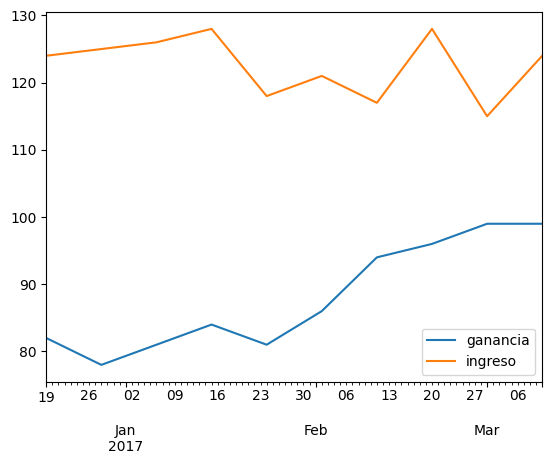

In [42]:
df.plot()

Al tener un índice de tiempo en un DataFrame para graficar, se obtienen las siguientes ventajas:

* Escala de tiempo automática: La biblioteca de visualización ajusta la escala y el formato de las etiquetas del eje X para reflejar fechas y/o horas, facilitando la interpretación de los datos en el contexto del tiempo.
* Agrupación y resumen: Puedes resumir, agregar o promediar tus datos por intervalos de tiempo utilizando métodos como resample() o asfreq(), y luego graficar estos resúmenes para observar tendencias a largo plazo o patrones estacionales.
* Comparación de series temporales: Es sencillo comparar varias series temporales que comparten el mismo índice de tiempo en un solo gráfico, lo que permite analizar correlaciones o discrepancias entre diferentes conjuntos de datos en el mismo marco temporal.

Estas ventajas facilitan la creación de gráficos más informativos y relevantes para el análisis de series temporales, proporcionando una representación visual clara de cómo los datos cambian y se comportan a lo largo del tiempo.

### Más sobre fechas y tiempo en Pandas: https://pandas.pydata.org/pandas-docs/stable/timeseries.html

# Actividad

In [43]:
# Generar un rango de fechas mensuales
dates = pd.date_range(start='2010-01-01', end='2020-12-31', freq='M')

# Crear datos simulados de temperatura
np.random.seed(0)
temperatures = 10 + 10 * np.random.rand(len(dates))  # Temperaturas entre 10 y 20 grados

# Crear el DataFrame
temperaturas = pd.DataFrame({'Temperature': temperatures}, index=dates)
temperaturas


,Temperature
2010-01-31,15.488135
2010-02-28,17.151894
2010-03-31,16.027634
2010-04-30,15.448832
2010-05-31,14.236548
...,...
2020-08-31,13.015748
2020-09-30,16.601735
2020-10-31,12.900776
2020-11-30,16.180154


**Nota**: La función np.random.seed(0) establece la semilla (o estado inicial) para el generador de números aleatorios de NumPy. Al fijar la semilla a un valor específico, como 0 en este caso, garantizas que la secuencia de números aleatorios generados por NumPy sea la misma cada vez que se ejecute el código. Esto es útil para la reproducibilidad de los resultados, especialmente cuando se trabaja con datos simulados o en situaciones donde es importante tener resultados consistentes a lo largo de diferentes ejecuciones del mismo código.

1. Muestra las temperaturas de los primeros tres meses del año.
2. Encuentra la temperatura más alta registrada en el año y el mes en que ocurrió.
3. Utiliza resample() para calcular la temperatura promedio trimestral y visualiza el resultado.
4. Visualización de la Serie de Tiempo: Utiliza el método plot() para visualizar la serie de tiempo de las temperaturas promedio mensuales.